PRAVEENA ANAND [CH.SC.U4CSE23044]

**K - NEAREST NEIGHBOURS:**

**Handwritten Specimen Dataset:**

Import Required Libraries:

In [17]:
import os
import urllib.request
import zipfile
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

Dataset Download and Extraction:

In [18]:
def download_dataset():
    url = "https://github.com/pbharrin/machinelearninginaction/raw/master/Ch02/digits.zip"
    zip_path = "digits.zip"

    if not os.path.exists("digits"):
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, zip_path)
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall()
        print("Dataset ready!")
    else:
        print("Dataset already exists!")

Load Dataset:

In [19]:
def load_dataset(folder):
    labels = []
    file_list = os.listdir(folder)
    m = len(file_list)
    data = np.zeros((m, 1024))

    for i, filename in enumerate(file_list):
        file_path = os.path.join(folder, filename)
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for j, line in enumerate(lines):
                for k, char in enumerate(line.strip()):
                    data[i, j*32 + k] = int(char)
        label = int(filename.split('_')[0])
        labels.append(label)
    return data, labels

KNN Classifier:

In [20]:
def knn_classify(test_point, train_data, train_labels, k=3):
    distances = np.linalg.norm(train_data - test_point, axis=1)
    nearest_indices = distances.argsort()[:k]
    nearest_labels = [train_labels[i] for i in nearest_indices]
    most_common = Counter(nearest_labels).most_common(1)
    return most_common[0][0]

Handwriting Recognition Test:

In [21]:
def handwriting_class_test():
    download_dataset()

    train_folder = "digits/trainingDigits"
    test_folder = "digits/testDigits"

    X_train, y_train = load_dataset(train_folder)
    X_test, y_test = load_dataset(test_folder)

    print("Training data shape:", X_train.shape)
    print("Test data shape:", X_test.shape)

    y_pred = []
    for i in range(len(X_test)):
        predicted = knn_classify(X_test[i], X_train, y_train, k=3)
        y_pred.append(predicted)

    correct = sum([1 for i in range(len(y_test)) if y_test[i]==y_pred[i]])
    accuracy = correct / len(y_test)
    print(f"KNN Accuracy: {accuracy*100:.2f}%")

    conf_mat = pd.crosstab(pd.Series(y_test, name='Actual'),
                           pd.Series(y_pred, name='Predicted'))

    plt.figure(figsize=(10,7))
    sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    plt.figure(figsize=(12,6))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(X_test[i].reshape(32,32), cmap='gray')
        plt.title(f"Pred:{y_pred[i]} / Actual:{y_test[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Run:

Dataset already exists!
Training data shape: (1934, 1024)
Test data shape: (946, 1024)
KNN Accuracy: 98.73%


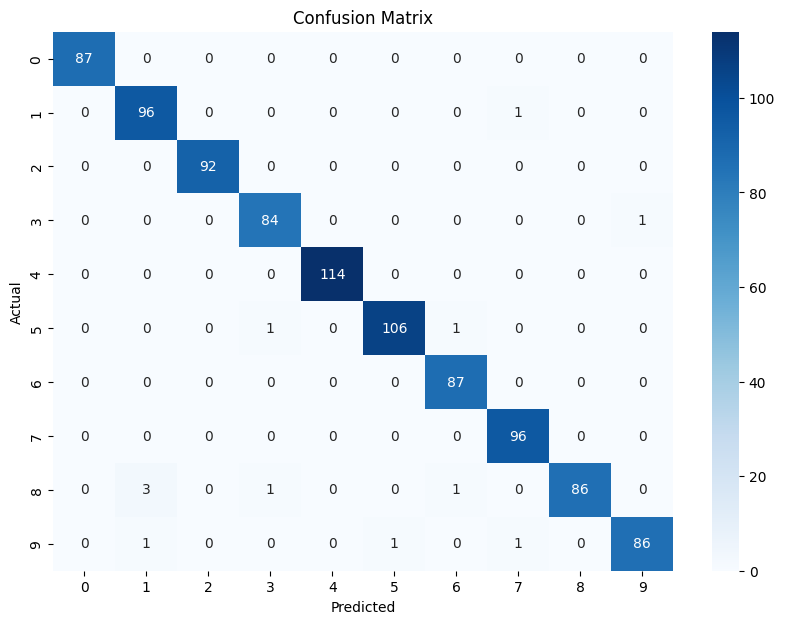

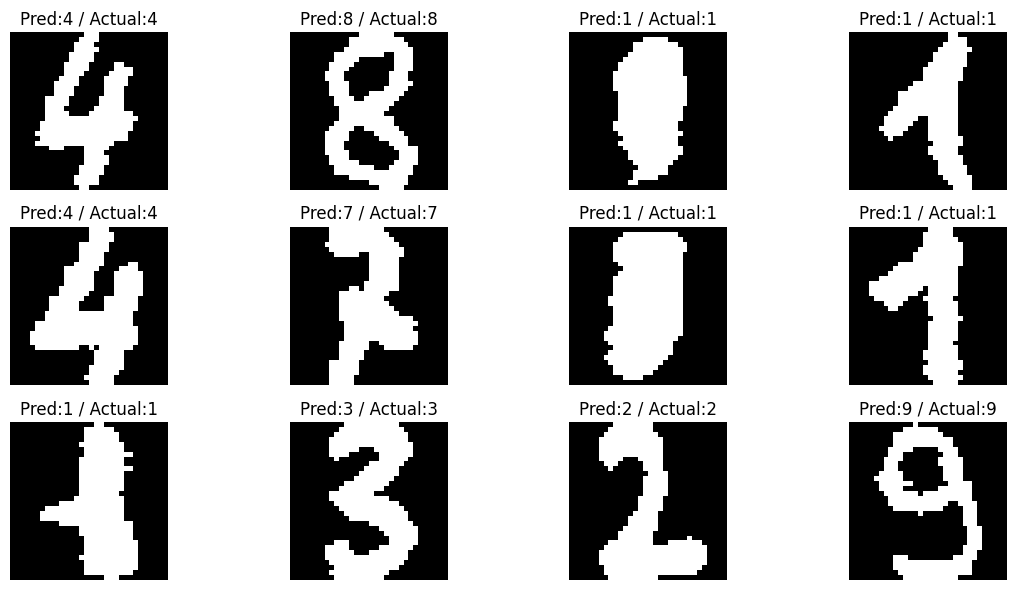

In [22]:
if __name__ == "__main__":
    handwriting_class_test()